# Model Comparison Tutorial

Trey V. Wenger (c) March 2024

Here we demonstrate the different `Caribou` models. We start by importing the package and loading the example data.

In [1]:
from IPython.display import SVG, display
    
import os
import pickle

import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import pandas as pd

import caribou
from caribou import (
    SimpleModel,
    ThermalModel,
    HierarchicalModel,
    HierarchicalThermalModel,
)

pd.options.display.max_rows = None

print("Caribou:", caribou.__version__)

# plot directory and extension
figdir = "figures"
ext = "svg"
if not os.path.isdir(figdir):
    os.mkdir(figdir)

Caribou: 0.0.1b


In [2]:
# Load example data
with open("example_data.pkl", "rb") as f:
    data = pickle.load(f)

## `SimpleModel`

We'll adopt a four-cloud (`n_cloud=4`) model with a 2nd order polynomial baseline (`baseline_degree=2`).

In [3]:
simple_model = SimpleModel(data, n_clouds=4, baseline_degree=2, seed=1234, verbose=True)

simple_model.set_priors(
    prior_log10_NHI = [20.0, 1.0], # cm-2
    prior_log10_kinetic_temp = [3.0, 1.0], # K
    prior_log10_density = [0.0, 1.0], # cm-3
    prior_log10_n_alpha = [-6.0, 1.0], # cm-3
    prior_log10_larson_linewidth = [0.2, 0.1], # km s-1
    prior_larson_power = [0.4, 0.1],
    prior_velocity = [0.0, 10.0], # km s-1
)

# model string representation
print(simple_model.model.str_repr())

       emission_coeffs ~ Normal(0, 1)
     absorption_coeffs ~ Normal(0, 1)
             log10_NHI ~ Normal(20, 1)
    log10_kinetic_temp ~ Normal(3, 1)
         log10_density ~ Normal(0, 1)
         log10_n_alpha ~ Normal(-6, 1)
log10_larson_linewidth ~ Normal(0.2, 0.1)
          larson_power ~ Normal(0.4, 0.1)
              velocity ~ Normal(0, 10)
       log10_spin_temp ~ Deterministic(f(log10_kinetic_temp, log10_n_alpha, log10_density))
    log10_thermal_fwhm ~ Deterministic(f(log10_kinetic_temp))
           log10_depth ~ Deterministic(f(log10_density, log10_NHI))
 log10_nonthermal_fwhm ~ Deterministic(f(log10_larson_linewidth, larson_power, log10_density, log10_NHI))
            log10_fwhm ~ Deterministic(f(log10_larson_linewidth, larson_power, log10_kinetic_temp, log10_density, log10_NHI))
        log10_peak_tau ~ Deterministic(f(log10_NHI, log10_kinetic_temp, log10_larson_linewidth, log10_n_alpha, larson_power, log10_density))
         emission_norm ~ Normal(f(emission_coeffs, l

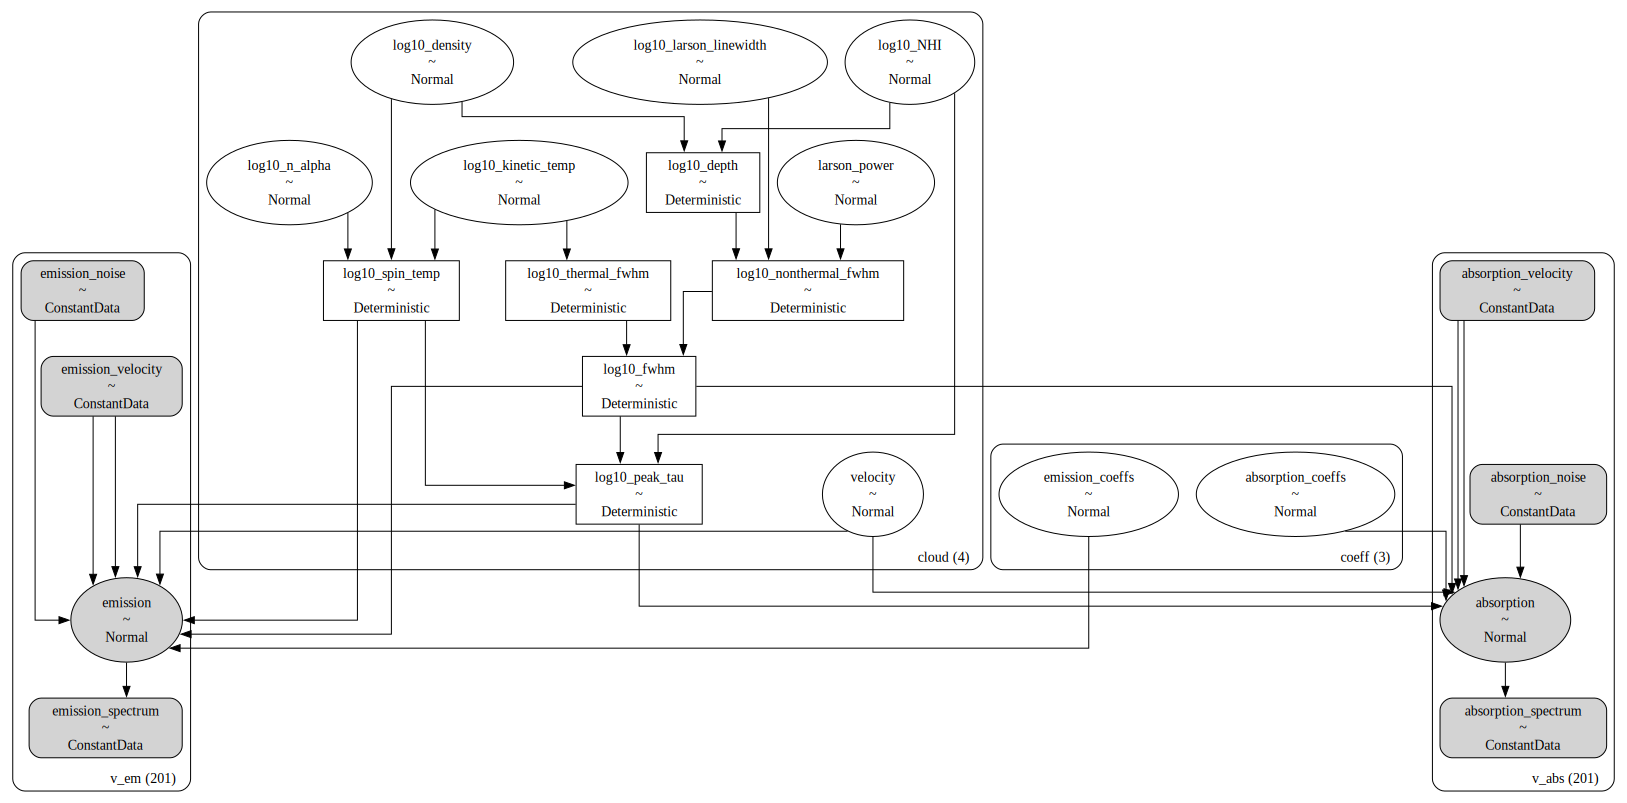

In [4]:
# Plot model graph
simple_model.plot_graph(f"{figdir}/simple_model.gv", "svg")
SVG(f"{figdir}/simple_model.gv.{ext}")

In [5]:
simple_model.sample(chains=8, cores=8)

Initializing NUTS using custom advi+adapt_diag strategy


Convergence achieved at 65900
Interrupted at 65,899 [13%]: Average Loss = 1.2237e+06
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [emission_coeffs, absorption_coeffs, log10_NHI, log10_kinetic_temp, log10_density, log10_n_alpha, log10_larson_linewidth, larson_power, velocity]


Sampling 8 chains for 1_000 tune and 1_000 draw iterations (8_000 + 8_000 draws total) took 254 seconds.


Only 7 chains appear converged.
There were 32 divergences in converged chains.


In [6]:
simple_model.solve()

GMM converged to unique solution


In [7]:
display(az.summary(simple_model.trace["solution_0"]))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
emission_coeffs[0],0.608,0.254,0.131,1.082,0.004,0.003,4555.0,4455.0,1.00
emission_coeffs[1],0.209,0.082,0.055,0.360,0.001,0.001,7660.0,4304.0,1.00
emission_coeffs[2],-0.238,0.137,-0.490,0.020,0.002,0.001,5065.0,4728.0,1.00
absorption_coeffs[0],-0.059,0.161,-0.344,0.264,0.002,0.002,5934.0,4555.0,1.00
absorption_coeffs[1],0.050,0.073,-0.092,0.182,0.001,0.001,8485.0,4901.0,1.00
absorption_coeffs[2],0.045,0.100,-0.144,0.234,0.001,0.001,6281.0,4765.0,1.00
log10_NHI[0],20.280,0.124,20.078,20.534,0.004,0.003,1341.0,1275.0,1.01
log10_NHI[1],20.694,0.056,20.587,20.765,0.002,0.001,1401.0,1256.0,1.01
log10_NHI[2],20.687,0.033,20.629,20.751,0.001,0.001,2245.0,2014.0,1.00
log10_NHI[3],20.822,0.032,20.762,20.875,0.001,0.001,2274.0,1895.0,1.00


## `ThermalModel`

`ThermalModel` extends `SimpleModel` to additionally constrain the thermal balance of the clouds.

In [8]:
thermal_model = ThermalModel(data, n_clouds=4, baseline_degree=2, seed=1234, verbose=True)

thermal_model.set_priors(
    prior_log10_NHI = [20.0, 1.0], # cm-2
    prior_log10_kinetic_temp = [3.0, 1.0], # K
    prior_log10_density = [0.0, 1.0], # cm-3
    prior_log10_n_alpha = [-6.0, 1.0], # cm-3
    prior_log10_larson_linewidth = [0.2, 0.1], # km s-1
    prior_larson_power = [0.4, 0.1],
    prior_velocity = [0.0, 10.0], # km s-1
    prior_log10_cr_ion_rate = [-16.0, 1.0], # s-1
    prior_log10_G0 = [0.0, 1.0], # Habing
    prior_log10_xCII = [-4.0, 1.0],
    prior_log10_xO = [-4.0, 1.0],
    prior_log10_inv_pah_recomb = [0.2, 0.1],
    prior_log10_thermal_ratio = [0.0, 1.0],
)

print(thermal_model.model.str_repr())

           emission_coeffs ~ Normal(0, 1)
         absorption_coeffs ~ Normal(0, 1)
                 log10_NHI ~ Normal(20, 1)
        log10_kinetic_temp ~ Normal(3, 1)
             log10_density ~ Normal(0, 1)
             log10_n_alpha ~ Normal(-6, 1)
    log10_larson_linewidth ~ Normal(0.2, 0.1)
              larson_power ~ Normal(0.4, 0.1)
                  velocity ~ Normal(0, 10)
         log10_cr_ion_rate ~ Normal(-16, 1)
                  log10_G0 ~ Normal(0, 1)
                log10_xCII ~ Normal(-4, 1)
                  log10_xO ~ Normal(-4, 1)
      log10_inv_pah_recomb ~ Normal(0.2, 0.1)
           log10_spin_temp ~ Deterministic(f(log10_kinetic_temp, log10_n_alpha, log10_density))
        log10_thermal_fwhm ~ Deterministic(f(log10_kinetic_temp))
               log10_depth ~ Deterministic(f(log10_density, log10_NHI))
     log10_nonthermal_fwhm ~ Deterministic(f(log10_larson_linewidth, larson_power, log10_density, log10_NHI))
                log10_fwhm ~ Deterministic(f(log1

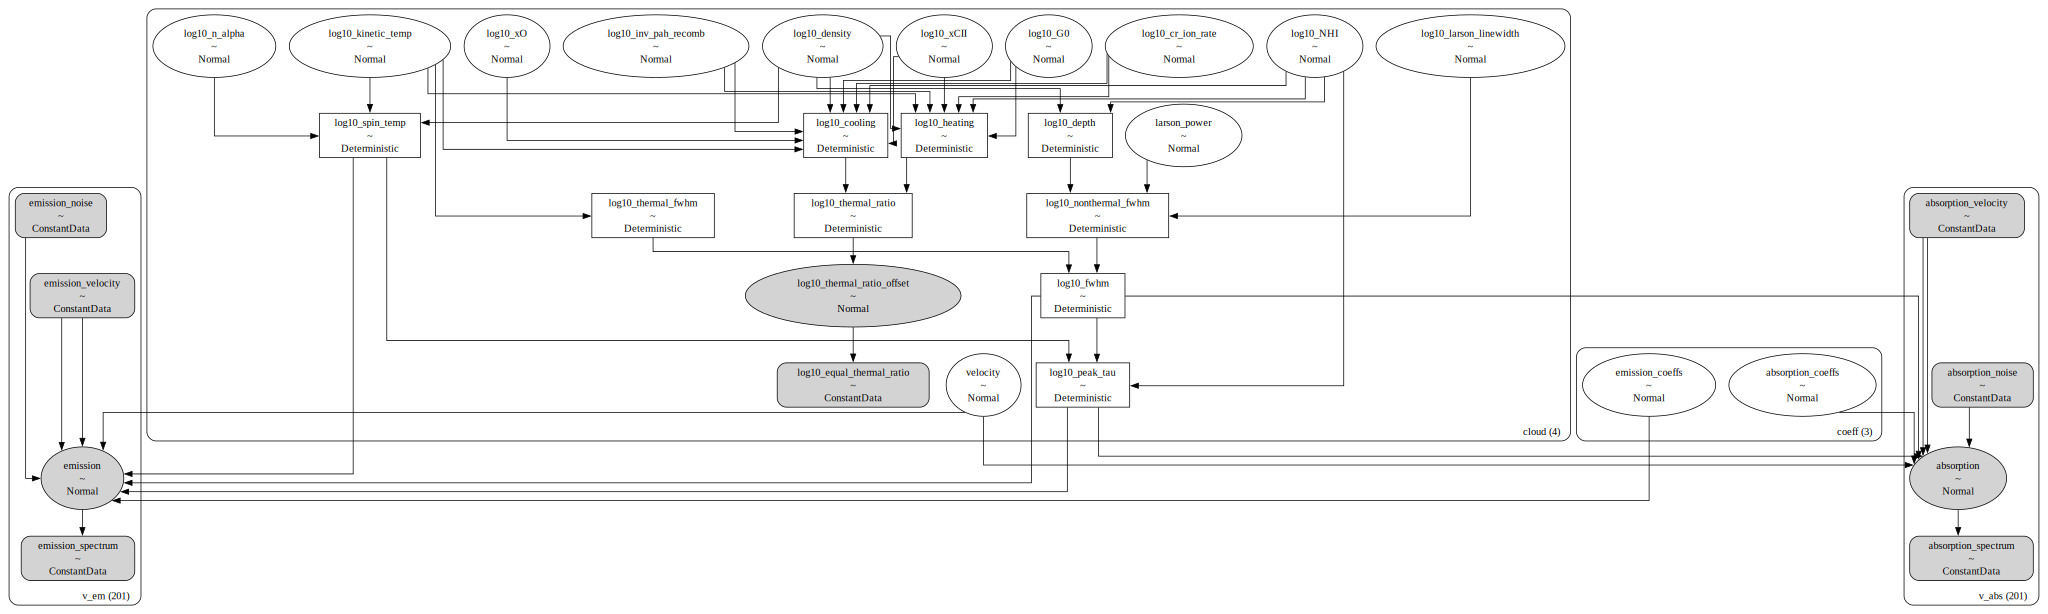

In [9]:
# Plot model graph
thermal_model.plot_graph(f"{figdir}/thermal_model.gv", "svg")
SVG(f"{figdir}/thermal_model.gv.{ext}")

In [10]:
thermal_model.sample(chains=8, cores=8)

Initializing NUTS using custom advi+adapt_diag strategy


Convergence achieved at 62600
Interrupted at 62,599 [12%]: Average Loss = 6.7791e+06
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [emission_coeffs, absorption_coeffs, log10_NHI, log10_kinetic_temp, log10_density, log10_n_alpha, log10_larson_linewidth, larson_power, velocity, log10_cr_ion_rate, log10_G0, log10_xCII, log10_xO, log10_inv_pah_recomb]


Sampling 8 chains for 1_000 tune and 1_000 draw iterations (8_000 + 8_000 draws total) took 246 seconds.


There were 44 divergences in converged chains.


In [11]:
thermal_model.solve()

GMM converged to unique solution


In [12]:
display(az.summary(thermal_model.trace["solution_0"]))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
emission_coeffs[0],0.609,0.249,0.141,1.080,0.004,0.003,4759.0,5380.0,1.00
emission_coeffs[1],0.209,0.078,0.054,0.348,0.001,0.001,8003.0,6182.0,1.00
emission_coeffs[2],-0.239,0.133,-0.488,0.008,0.002,0.001,4757.0,5352.0,1.00
absorption_coeffs[0],-0.065,0.158,-0.352,0.245,0.002,0.002,5604.0,5231.0,1.00
absorption_coeffs[1],0.052,0.072,-0.088,0.187,0.001,0.001,9448.0,6184.0,1.00
absorption_coeffs[2],0.048,0.099,-0.135,0.237,0.001,0.001,5735.0,5460.0,1.00
log10_NHI[0],20.296,0.124,20.091,20.544,0.003,0.002,1448.0,1729.0,1.01
log10_NHI[1],20.688,0.057,20.577,20.762,0.002,0.001,1601.0,1684.0,1.00
log10_NHI[2],20.689,0.033,20.629,20.748,0.001,0.001,2492.0,2387.0,1.00
log10_NHI[3],20.820,0.033,20.763,20.875,0.001,0.001,2370.0,2322.0,1.00


## Hierarchical Model

`HierarchicalModel` is like `SimpleModel`, but the priors are modeled using hyperdistributions.

In [13]:
hierarchical_model = HierarchicalModel(data, n_clouds=4, baseline_degree=2, seed=1234, verbose=True)

hierarchical_model.set_priors(
    prior_log10_NHI = [20.0, 0.5, 0.5], # cm-2
    prior_log10_kinetic_temp = [3.0, 0.5, 0.5], # K
    prior_log10_density = [0.0, 0.5, 0.5], # cm-3
    prior_log10_n_alpha = [-6.0, 0.5, 0.5], # cm-3
    prior_log10_larson_linewidth = [0.2, 0.05, 0.05], # km s-1
    prior_larson_power = [0.4, 0.05, 0.05],
    prior_velocity = [0.0, 5.0, 5.0], # km s-1
)

# model string representation
print(hierarchical_model.model.str_repr())

              emission_coeffs ~ Normal(0, 1)
            absorption_coeffs ~ Normal(0, 1)
                 log10_NHI_mu ~ Normal(20, 0.5)
              log10_NHI_sigma ~ HalfNormal(0, 0.5)
             log10_NHI_offset ~ Normal(0, 1)
        log10_kinetic_temp_mu ~ Normal(3, 0.5)
     log10_kinetic_temp_sigma ~ HalfNormal(0, 0.5)
    log10_kinetic_temp_offset ~ Normal(0, 1)
             log10_density_mu ~ Normal(0, 0.5)
          log10_density_sigma ~ HalfNormal(0, 0.5)
         log10_density_offset ~ Normal(0, 1)
             log10_n_alpha_mu ~ Normal(-6, 0.5)
          log10_n_alpha_sigma ~ HalfNormal(0, 0.5)
         log10_n_alpha_offset ~ Normal(0, 1)
    log10_larson_linewidth_mu ~ Normal(0.2, 0.05)
 log10_larson_linewidth_sigma ~ HalfNormal(0, 0.05)
log10_larson_linewidth_offset ~ Normal(0, 1)
              larson_power_mu ~ Normal(0.4, 0.05)
           larson_power_sigma ~ HalfNormal(0, 0.05)
          larson_power_offset ~ Normal(0, 1)
                  velocity_mu ~ Normal(0, 

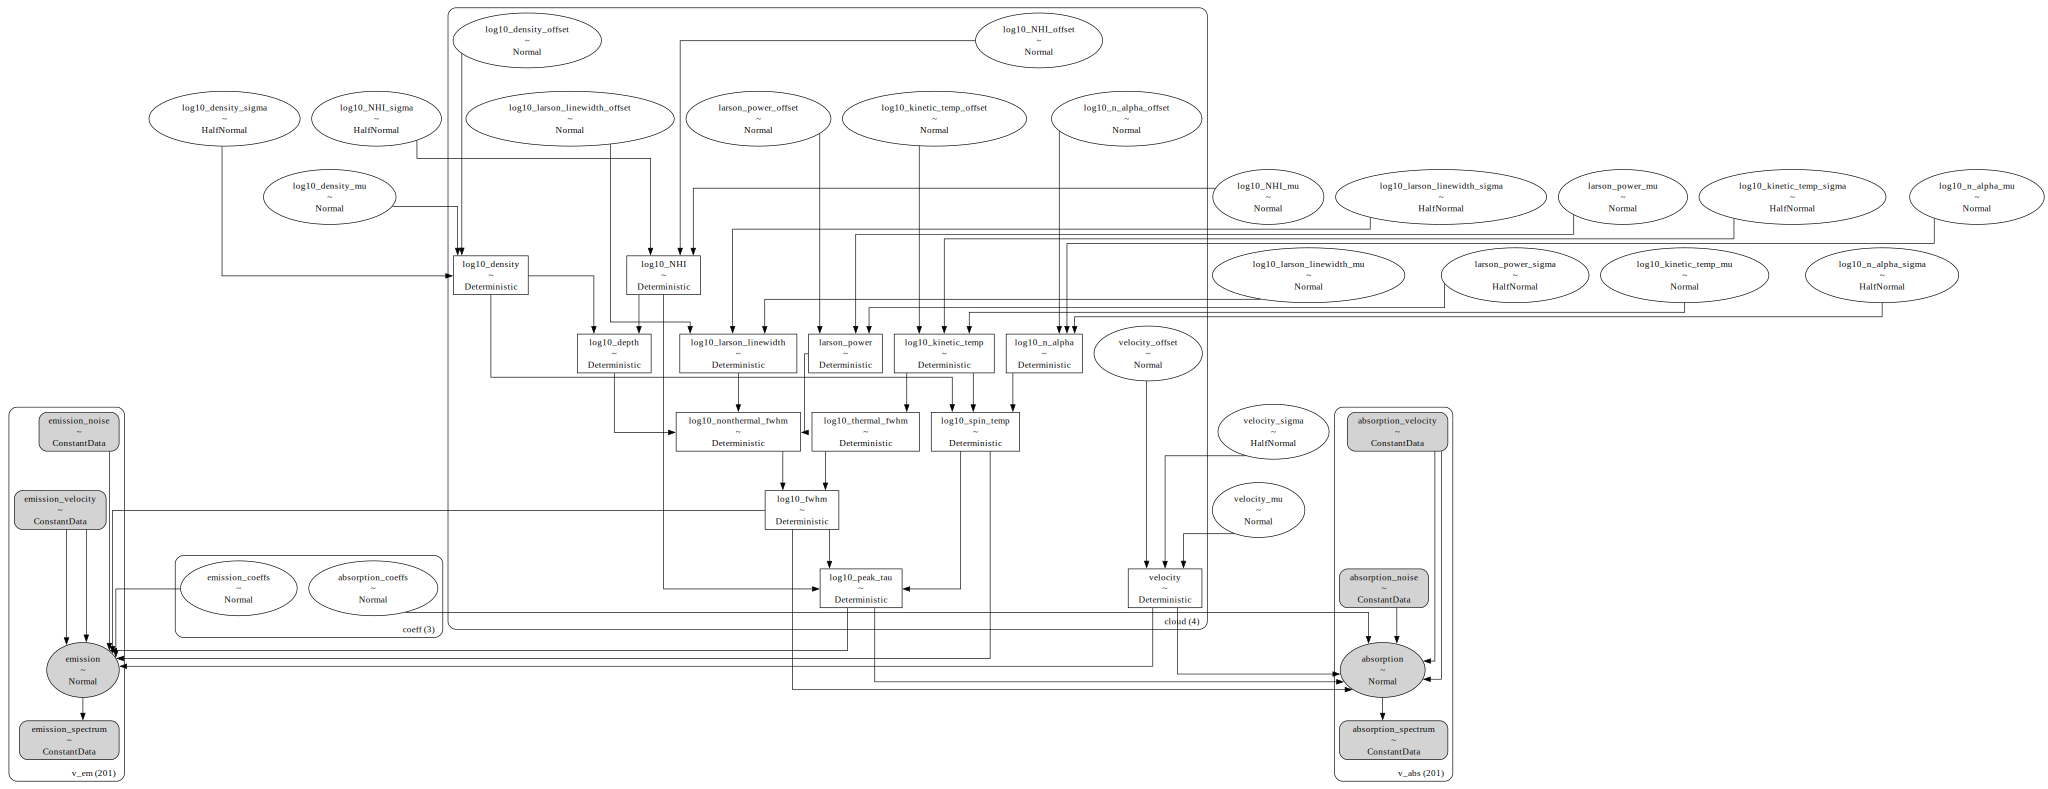

In [14]:
# Plot model graph
hierarchical_model.plot_graph(f"{figdir}/hierarchical_model.gv", "svg")
SVG(f"{figdir}/hierarchical_model.gv.{ext}")

Hierarchical models can be trickier to sample, so we need to adjust the sampling parameters.

In [15]:
hierarchical_model.sample(
    tune=2000, # more tuning samples
    chains=8,
    cores=8,
    init_kwargs={"learning_rate": 0.01, "abs_tolerance": 0.05}, # initialization convergence
    nuts_kwargs={"target_accept": 0.9}, # higher target_accept to reduce divergences
)

Initializing NUTS using custom advi+adapt_diag strategy


Convergence achieved at 282700
Interrupted at 282,699 [56%]: Average Loss = 2.127e+06
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [emission_coeffs, absorption_coeffs, log10_NHI_mu, log10_NHI_sigma, log10_NHI_offset, log10_kinetic_temp_mu, log10_kinetic_temp_sigma, log10_kinetic_temp_offset, log10_density_mu, log10_density_sigma, log10_density_offset, log10_n_alpha_mu, log10_n_alpha_sigma, log10_n_alpha_offset, log10_larson_linewidth_mu, log10_larson_linewidth_sigma, log10_larson_linewidth_offset, larson_power_mu, larson_power_sigma, larson_power_offset, velocity_mu, velocity_sigma, velocity_offset]


Sampling 8 chains for 2_000 tune and 1_000 draw iterations (16_000 + 8_000 draws total) took 1101 seconds.


Only 7 chains appear converged.
There were 19 divergences in converged chains.


In [16]:
hierarchical_model.solve()

GMM converged to unique solution


In [17]:
display(az.summary(hierarchical_model.trace["solution_0"]))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
emission_coeffs[0],0.565,0.254,0.116,1.065,0.012,0.009,457.0,1065.0,1.02
emission_coeffs[1],0.206,0.080,0.060,0.363,0.003,0.002,932.0,1829.0,1.01
emission_coeffs[2],-0.218,0.136,-0.476,0.031,0.006,0.004,483.0,1156.0,1.02
absorption_coeffs[0],-0.086,0.162,-0.371,0.227,0.007,0.005,554.0,1417.0,1.01
absorption_coeffs[1],0.046,0.075,-0.091,0.195,0.002,0.002,997.0,2140.0,1.01
absorption_coeffs[2],0.058,0.099,-0.139,0.232,0.004,0.003,595.0,1448.0,1.01
log10_NHI_mu,20.567,0.157,20.238,20.842,0.010,0.007,253.0,467.0,1.02
log10_NHI_offset[0],-1.082,0.699,-2.386,0.170,0.034,0.024,399.0,638.0,1.02
log10_NHI_offset[1],0.380,0.477,-0.497,1.318,0.028,0.020,295.0,600.0,1.02
log10_NHI_offset[2],0.345,0.503,-0.569,1.310,0.031,0.022,259.0,510.0,1.03


## `HierarchicalThermalModel`

Finally, `HierarchicalThermalModel` is a hierarchical version of `ThermalModel`.

In [18]:
hierarchical_thermal_model = HierarchicalThermalModel(data, n_clouds=4, baseline_degree=2, seed=1234, verbose=True)

hierarchical_thermal_model.set_priors(
    prior_log10_NHI = [20.0, 0.5, 0.5], # cm-2
    prior_log10_kinetic_temp = [3.0, 0.5, 0.5], # K
    prior_log10_density = [0.0, 0.5, 0.5], # cm-3
    prior_log10_n_alpha = [-6.0, 0.5, 0.5], # cm-3
    prior_log10_larson_linewidth = [0.2, 0.05, 0.05], # km s-1
    prior_larson_power = [0.4, 0.05, 0.05],
    prior_velocity = [0.0, 5.0, 5.0], # km s-1
    prior_log10_cr_ion_rate = [-16.0, 0.5, 0.5], # s-1
    prior_log10_G0 = [0.0, 0.5, 0.5], # Habing
    prior_log10_xCII = [-4.0, 0.5, 0.5],
    prior_log10_xO = [-4.0, 0.5, 0.5],
    prior_log10_inv_pah_recomb = [0.2, 0.05, 0.05],
    prior_log10_thermal_ratio = [0.0, 0.5, 0.5],
)

# model string representation
print(hierarchical_thermal_model.model.str_repr())

              emission_coeffs ~ Normal(0, 1)
            absorption_coeffs ~ Normal(0, 1)
                 log10_NHI_mu ~ Normal(20, 0.5)
              log10_NHI_sigma ~ HalfNormal(0, 0.5)
             log10_NHI_offset ~ Normal(0, 1)
        log10_kinetic_temp_mu ~ Normal(3, 0.5)
     log10_kinetic_temp_sigma ~ HalfNormal(0, 0.5)
    log10_kinetic_temp_offset ~ Normal(0, 1)
             log10_density_mu ~ Normal(0, 0.5)
          log10_density_sigma ~ HalfNormal(0, 0.5)
         log10_density_offset ~ Normal(0, 1)
             log10_n_alpha_mu ~ Normal(-6, 0.5)
          log10_n_alpha_sigma ~ HalfNormal(0, 0.5)
         log10_n_alpha_offset ~ Normal(0, 1)
    log10_larson_linewidth_mu ~ Normal(0.2, 0.05)
 log10_larson_linewidth_sigma ~ HalfNormal(0, 0.05)
log10_larson_linewidth_offset ~ Normal(0, 1)
              larson_power_mu ~ Normal(0.4, 0.05)
           larson_power_sigma ~ HalfNormal(0, 0.05)
          larson_power_offset ~ Normal(0, 1)
                  velocity_mu ~ Normal(0, 

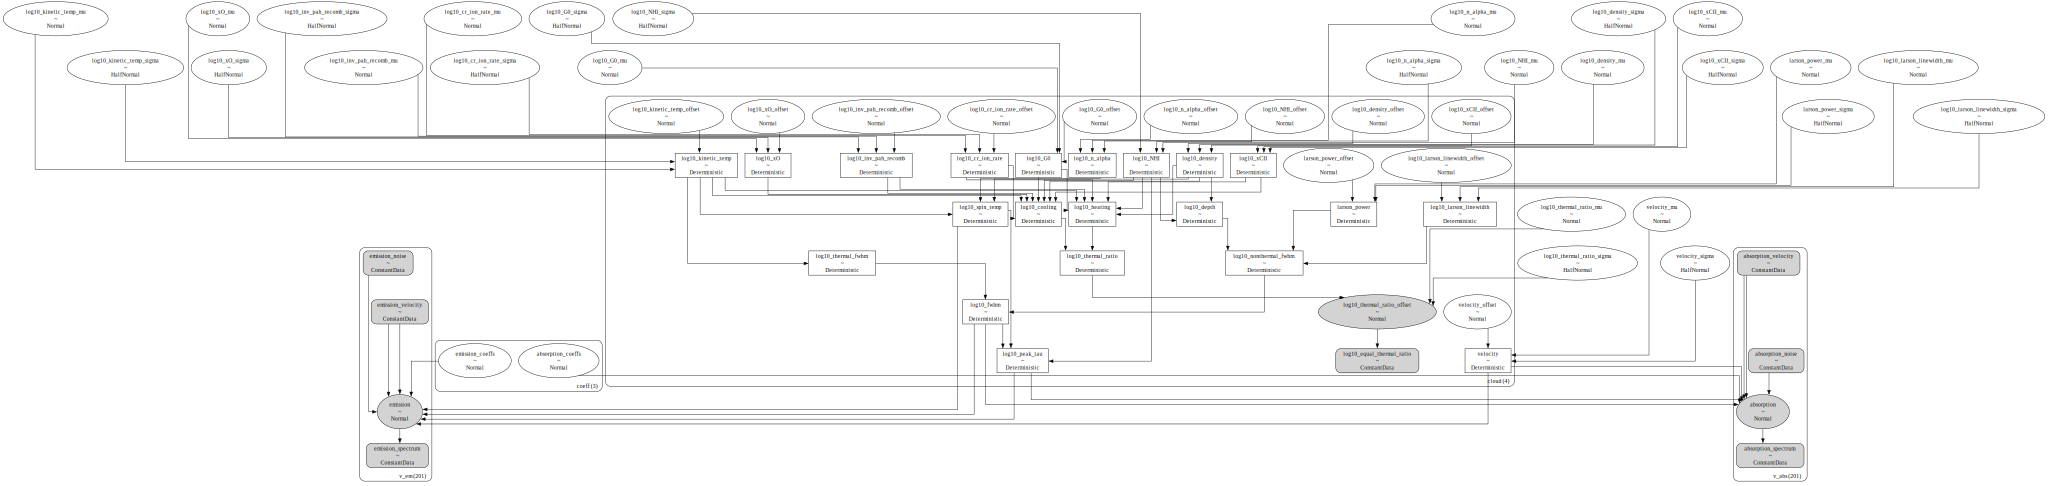

In [19]:
# Plot model graph
hierarchical_thermal_model.plot_graph(f"{figdir}/hierarchical_thermal_model.gv", "svg")
SVG(f"{figdir}/hierarchical_thermal_model.gv.{ext}")

In [20]:
hierarchical_thermal_model.sample(
    tune=2000, # more tuning samples
    chains=8,
    cores=8,
    init_kwargs={"learning_rate": 0.01, "abs_tolerance": 0.075}, # initialization convergence
    nuts_kwargs={"target_accept": 0.9}, # higher target_accept to reduce divergences
)

Initializing NUTS using custom advi+adapt_diag strategy


Convergence achieved at 8700
Interrupted at 8,699 [1%]: Average Loss = 6.0355e+05
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [emission_coeffs, absorption_coeffs, log10_NHI_mu, log10_NHI_sigma, log10_NHI_offset, log10_kinetic_temp_mu, log10_kinetic_temp_sigma, log10_kinetic_temp_offset, log10_density_mu, log10_density_sigma, log10_density_offset, log10_n_alpha_mu, log10_n_alpha_sigma, log10_n_alpha_offset, log10_larson_linewidth_mu, log10_larson_linewidth_sigma, log10_larson_linewidth_offset, larson_power_mu, larson_power_sigma, larson_power_offset, velocity_mu, velocity_sigma, velocity_offset, log10_cr_ion_rate_mu, log10_cr_ion_rate_sigma, log10_cr_ion_rate_offset, log10_G0_mu, log10_G0_sigma, log10_G0_offset, log10_xCII_mu, log10_xCII_sigma, log10_xCII_offset, log10_xO_mu, log10_xO_sigma, log10_xO_offset, log10_inv_pah_recomb_mu, log10_inv_pah_recomb_sigma, log10_inv_pah_recomb_offset, log10_thermal_ratio_mu, log10_thermal_ratio_sigma]


Sampling 8 chains for 2_000 tune and 1_000 draw iterations (16_000 + 8_000 draws total) took 1823 seconds.


There were 40 divergences in converged chains.


In [21]:
hierarchical_thermal_model.solve()

GMM converged to unique solution


In [22]:
display(az.summary(hierarchical_thermal_model.trace["solution_0"]))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
emission_coeffs[0],0.604,0.244,0.154,1.057,0.010,0.007,577.0,1300.0,1.01
emission_coeffs[1],0.211,0.080,0.071,0.373,0.002,0.002,1278.0,2169.0,1.01
emission_coeffs[2],-0.237,0.132,-0.467,0.019,0.005,0.004,606.0,1334.0,1.01
absorption_coeffs[0],-0.093,0.162,-0.382,0.218,0.007,0.005,550.0,1495.0,1.02
absorption_coeffs[1],0.054,0.072,-0.076,0.196,0.002,0.001,1265.0,2436.0,1.00
absorption_coeffs[2],0.065,0.100,-0.127,0.248,0.004,0.003,565.0,1582.0,1.02
log10_NHI_mu,20.548,0.161,20.201,20.830,0.012,0.009,163.0,332.0,1.05
log10_NHI_offset[0],-0.984,0.718,-2.306,0.326,0.040,0.028,305.0,416.0,1.03
log10_NHI_offset[1],0.454,0.482,-0.440,1.373,0.038,0.027,157.0,509.0,1.05
log10_NHI_offset[2],0.980,0.553,-0.040,1.987,0.034,0.024,251.0,674.0,1.03


## Model Comparison

We now have four different models fit to the same data. Which is the best? We can inspect the BICs.

In [23]:
models = {
    "SimpleModel": simple_model,
    "ThermalModel": thermal_model,
    "HierarchicalModel": hierarchical_model,
    "HierarchicalThermalModel": hierarchical_thermal_model,
}
for model_type, model in models.items():
    print(f"{model_type} BIC = {model.bic():.3e}")

SimpleModel BIC = 1.832e+03
ThermalModel BIC = 2.025e+03
HierarchicalModel BIC = 1.075e+04
HierarchicalThermalModel BIC = 1.733e+04


Based on the BICs, `SimpleModel` is best. We can also test the out-of-sample predictive power of each model. We must first calculate the data likelihood from the posterior samples.

In [24]:
# evaluate likelihood
for model_type, model in models.items():
    with model.model:
        if "log_likelihood" not in model.trace:
            pm.compute_log_likelihood(model.trace)

In [25]:
loo_emission = az.compare({model_type: model.trace for model_type, model in models.items()}, var_name="emission_norm")
loo_emission

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
HierarchicalThermalModel,0,-324.675233,17.636433,0.000000,1.000000e+00,12.960296,0.000000,False,log
HierarchicalModel,1,-327.258167,19.116379,2.582935,0.000000e+00,13.323795,0.809218,False,log
ThermalModel,2,-330.369587,20.128835,5.694355,0.000000e+00,13.762233,1.819064,False,log
SimpleModel,3,-330.924450,20.817166,6.249217,5.950795e-14,13.797825,1.863717,False,log


In [26]:
loo_absorption = az.compare({model_type: model.trace for model_type, model in models.items()}, var_name="absorption_norm")
loo_absorption

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
HierarchicalThermalModel,0,-280.514467,7.747008,0.000000,1.000000e+00,7.821918,0.000000,False,log
HierarchicalModel,1,-281.558369,8.568453,1.043902,0.000000e+00,7.927806,0.789387,False,log
ThermalModel,2,-283.888092,9.674324,3.373626,0.000000e+00,8.162157,1.414127,False,log
SimpleModel,3,-283.955713,9.749735,3.441246,2.309264e-14,8.155873,1.494768,False,log


Here we see that `HierarchicalThermalModel` has nominally better predictive power, but the expected log pointwise predictive density (`elpd_loo`) is hardly better than the other models, especially considering the uncertainty (`se`). In this case, `SimpleModel` is good enough!